In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv(r'D:\Machine_learning_projects\notebooks\data\UCI_Credit_Card.csv')
data_train,data_test = train_test_split(data,random_state=42,test_size=.15)
data_train.sample(10).T

,21115,29065,15707,14516,15889,6382,4899,7413,22161,14920
ID,21116.0,29066.0,15708.0,14517.0,15890.0,6383.0,4900.0,7414.0,22162.0,14921.0
LIMIT_BAL,350000.0,100000.0,370000.0,80000.0,70000.0,80000.0,210000.0,230000.0,150000.0,320000.0
SEX,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
EDUCATION,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
MARRIAGE,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
AGE,47.0,55.0,39.0,43.0,27.0,30.0,34.0,36.0,29.0,30.0
PAY_0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0
PAY_2,0.0,0.0,2.0,0.0,0.0,2.0,-1.0,-1.0,-1.0,-1.0
PAY_3,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
PAY_4,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0


Basic Information extraction from data

In [7]:
df = data_train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25500 entries, 17443 to 23654
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          25500 non-null  int64  
 1   LIMIT_BAL                   25500 non-null  float64
 2   SEX                         25500 non-null  object 
 3   EDUCATION                   25500 non-null  object 
 4   MARRIAGE                    25500 non-null  object 
 5   AGE                         25500 non-null  int64  
 6   PAY_0                       25500 non-null  int64  
 7   PAY_2                       25500 non-null  int64  
 8   PAY_3                       25500 non-null  int64  
 9   PAY_4                       25500 non-null  int64  
 10  PAY_5                       25500 non-null  int64  
 11  PAY_6                       25500 non-null  int64  
 12  BILL_AMT1                   25500 non-null  float64
 13  BILL_AMT2                   2550

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
duplicates = df.duplicated().sum()
if duplicates==0:
    print("Data has no Duplicate rows")
else:
    print(f"Data has {duplicates} entries.")

Data has no Duplicate rows


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25500.0,14997.947490,8676.752735,1.0,7450.75,15033.5,22500.50,29999.0
LIMIT_BAL,25500.0,167436.458039,129837.118639,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,25500.0,35.503333,9.235048,21.0,28.00,34.0,42.00,79.0
PAY_0,25500.0,-0.016275,1.126813,-2.0,-1.00,0.0,0.00,8.0
PAY_2,25500.0,-0.131882,1.196710,-2.0,-1.00,0.0,0.00,8.0
PAY_3,25500.0,-0.166706,1.192883,-2.0,-1.00,0.0,0.00,8.0
PAY_4,25500.0,-0.218667,1.168375,-2.0,-1.00,0.0,0.00,8.0
PAY_5,25500.0,-0.264157,1.132166,-2.0,-1.00,0.0,0.00,8.0
PAY_6,25500.0,-0.288118,1.151189,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,25500.0,51154.158392,73720.356540,-165580.0,3565.00,22366.5,66803.50,964511.0


### Overview on data
- Data has 30000 Rows and 25 columns. But this data can be devided into 9 parts ('ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY', 'BILL_AMT', 'PAY_AMT','target_column')
- ID columns has no relation with other coulmns so it can droped.
- Data is prety good as it has no empty elements in any columns and also there is no duplicate entries in data.
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) :- Here (1=graduate school, 2=university, 3=high school) are perfectly define orderd categories but we have no more info related to ( 4=others, 5=unknown, 6=unknown) these columns so we can concatenate these columns and put it as 0 or 4 to messure there impact in our further analysis.
- MARRIAGE: Marital status (1=married, 2=single, 3=others) :-  (3=others) for these column, there is no to much info so we need to carefully analysis this column and messure the impact on our analysis.
- PAY: Repayment status in Months, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [11]:
df.drop(columns='ID',inplace=True)

### Target column (default.payment.next.month) analysis

Inference 
Probability of Non Defaulters : 0.78
Probability of defaulters :0.22


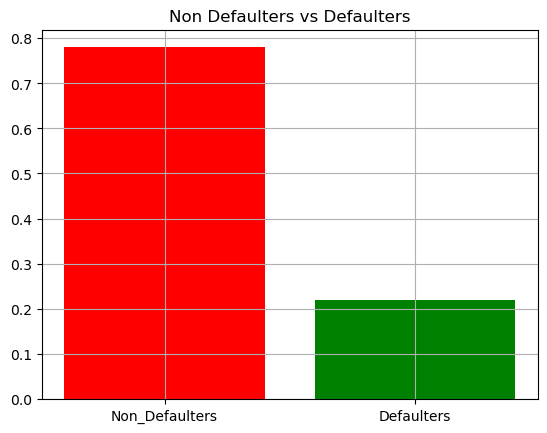

In [12]:
Target = 'default.payment.next.month'
Non_Defaulters,Defaulters = round(df[Target].value_counts(normalize=True),2)
print(f"Inference \nProbability of Non Defaulters : {Non_Defaulters}\nProbability of defaulters :{Defaulters}")
# Visual repersentation
plt.bar(['Non_Defaulters','Defaulters'],[Non_Defaulters,Defaulters],color=['r','g'])
plt.title("Non Defaulters vs Defaulters")
#plt.style.use('dark_background')
plt.grid()
plt.show()

- Traget coulmns has 78% data of Non Defaulters data and rest of data is rerlated to Defaulters.
- So we can say this is not very balanced dataset to perform classification for defaulters. Means our model can be prone to type2 error.



In [92]:
def Relation_Target(ctr):
    df['default.payment.next.month'] = df['default.payment.next.month'].replace({1:"Defaulter",0:"Not-Defaulter"})
    df.groupby('default.payment.next.month')[ctr].mean().plot.bar(color = ['red','green'])
    plt.title(f"Mean {ctr} v/s Target")
    plt.grid()
    print(df.groupby('default.payment.next.month')[ctr].mean())

default.payment.next.month
Defaulter        129504.292562
Not-Defaulter    178191.573967
Name: LIMIT_BAL, dtype: float64


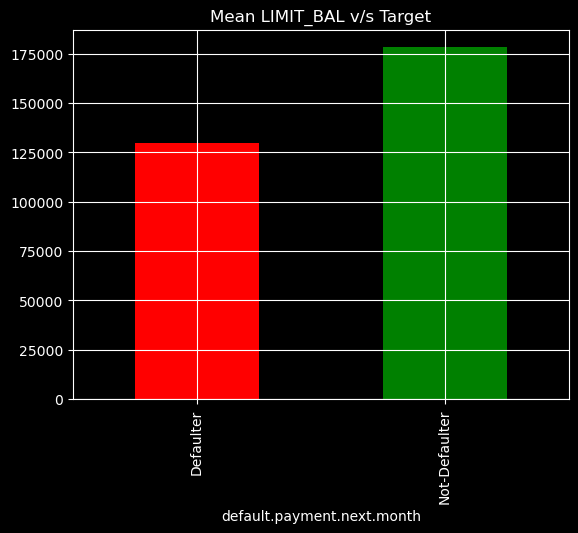

In [93]:
Relation_Target('LIMIT_BAL')

LIMIT_BAL : Amount of given credit in NT dollars (includes individual and family/supplementary credit)

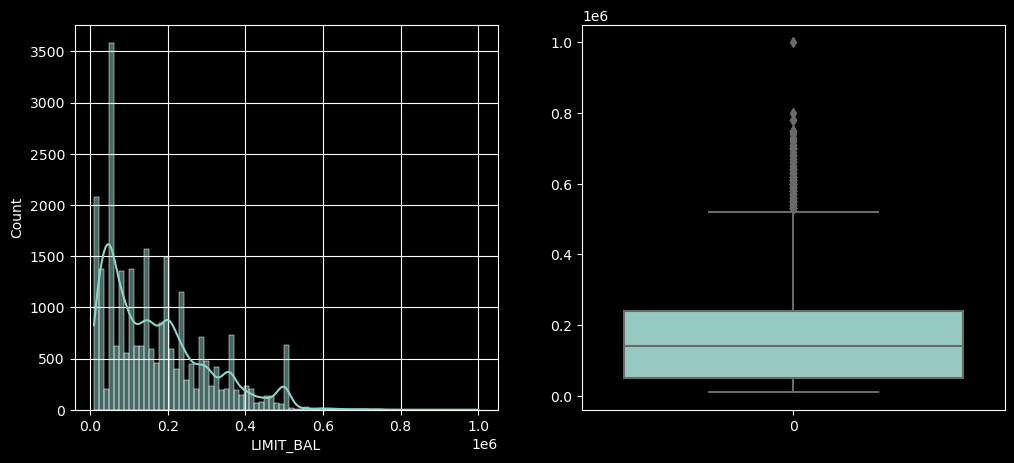

In [94]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(df['LIMIT_BAL'],ax=ax1,kde =True);
ax1.grid();
sns.boxplot(df['LIMIT_BAL'],ax=ax2);

From the conclusion of this plots :
- This columns has right skewed distribution.
- With right skewed distribution it has also a lot of outliers.        

lets apply yeo-johnson transformatiion to make it normally distributed data.

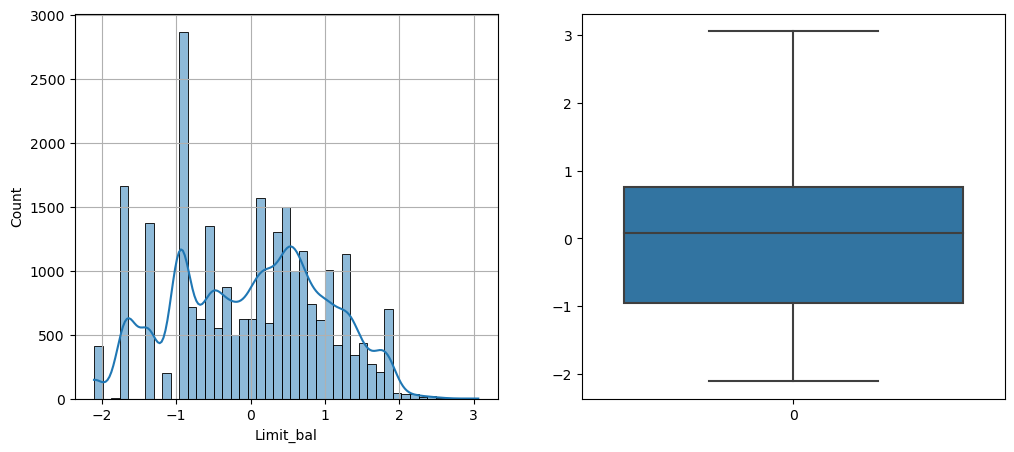

In [13]:
from sklearn.preprocessing import PowerTransformer
df1 = pd.DataFrame(df['LIMIT_BAL'])
pt1 = PowerTransformer()
limit_bal_trans = pt1.fit_transform(df1)
limit_bal_trans= pd.DataFrame(limit_bal_trans,columns=['Limit_bal'])

fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(limit_bal_trans['Limit_bal'],ax=ax1,kde =True);
ax1.grid();
sns.boxplot(limit_bal_trans['Limit_bal'],ax=ax2);


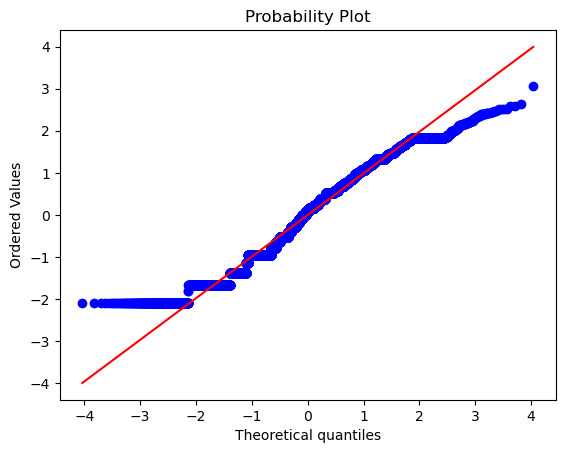

In [14]:
import scipy.stats as st
fig,ax = plt.subplots(ncols=1,nrows=1)
st.probplot(limit_bal_trans['Limit_bal'],dist='norm',plot=ax);

- With yeo-jhonshon transformation we can remove almost all outliers and also got a distribution near to normal transformation

#### Sex, Education, Marrige  m


In [15]:
print(f"Unique values in sex column : {df['SEX'].unique()}")
print(f"Unique values in Educaton column : {df['EDUCATION'].unique()}")
print(f"Unique values in Martial status column : {df['MARRIAGE'].unique()}")

Unique values in sex column : [2 1]
Unique values in Educaton column : [2 4 1 3 5 6 0]
Unique values in Martial status column : [1 2 0 3]


- Sex : Gender (1 = Male , 2 = Female)
- Education : (1-Graduat school, 2-University, 3-high school, 4-Others, 5-Unknown, 6-Unknown)
- Marrige : Martial status (1-married, 2-Single, 3=Other)

<BarContainer object of 2 artists>

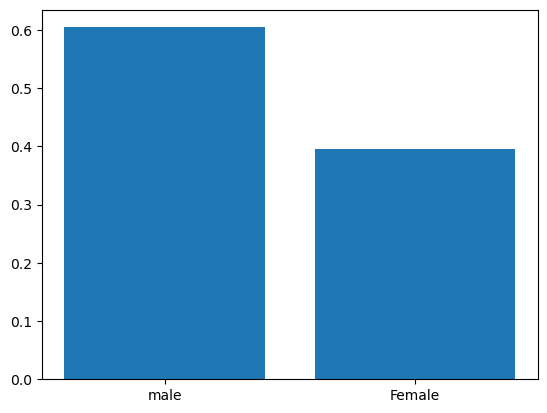

In [16]:
df["SEX"] = df["SEX"].replace({"male":1,"female":2})

Prob_SEX=df["SEX"].value_counts(normalize=True)
plt.bar(["male","Female"],Prob_SEX)      

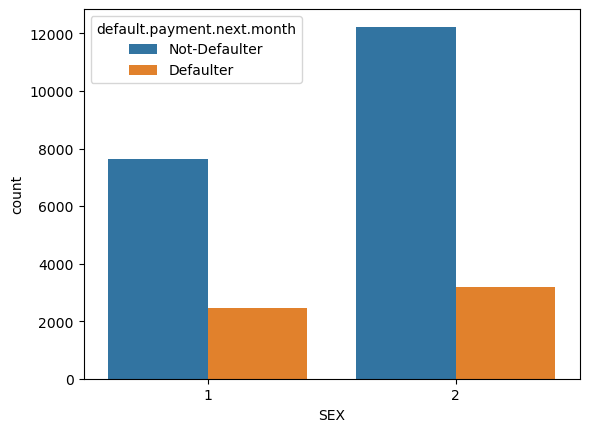

In [17]:

sns.countplot(x='SEX', hue='default.payment.next.month', data=df);


Sex column has good balanced data between male and female

In [18]:
df[ 'default.payment.next.month'].unique()

array(['Not-Defaulter', 'Defaulter'], dtype=object)

In [19]:
df[ 'default.payment.next.month'] = df['default.payment.next.month'].replace({'Not-Defaulter':0, 'Defaulter':1})

In [20]:
def plot_category(cate_col):
    plt.title('{0} vs DEFAULT PROBABILITY'.format(cate_col))
    df.groupby(cate_col)['default.payment.next.month'].mean().plot.bar()
    plt.grid()
    plt.style.use('dark_background') 
    plt.show()
    print(df.groupby(cate_col)['default.payment.next.month'].mean())

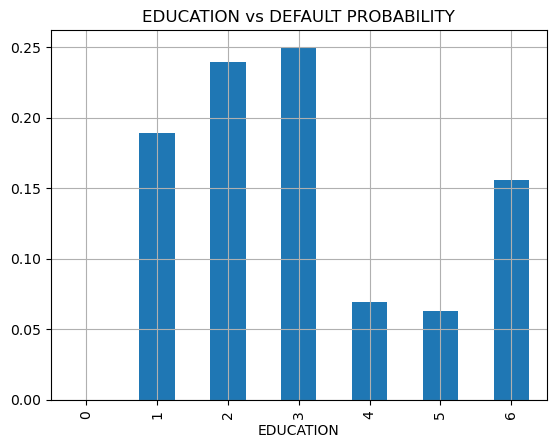

EDUCATION
0    0.000000
1    0.189141
2    0.239818
3    0.249583
4    0.069307
5    0.062762
6    0.155556
Name: default.payment.next.month, dtype: float64


In [21]:
plot_category('EDUCATION')

In Education data we have no good information about elements 0,4,5 and 6, so we can combine them and make a single component for these elements. 

In [22]:
df["EDUCATION"] = df["EDUCATION"].replace({0:4,5:4,6:4})


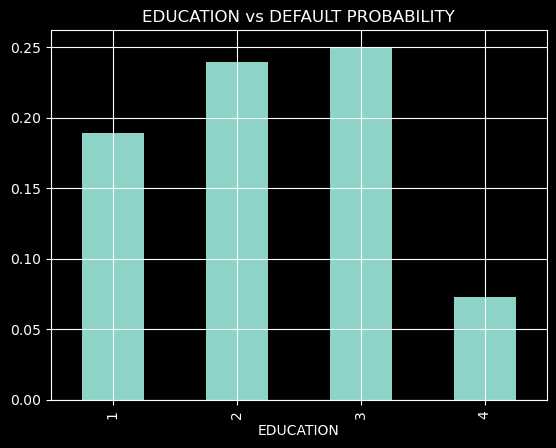

EDUCATION
1    0.189141
2    0.239818
3    0.249583
4    0.073232
Name: default.payment.next.month, dtype: float64


In [23]:
plot_category('EDUCATION')

- With Education columns we can use above prediction where we have given all unknown values to 4 but we can also give it to 0 so with which choice we get best result we can go with same choice.
 

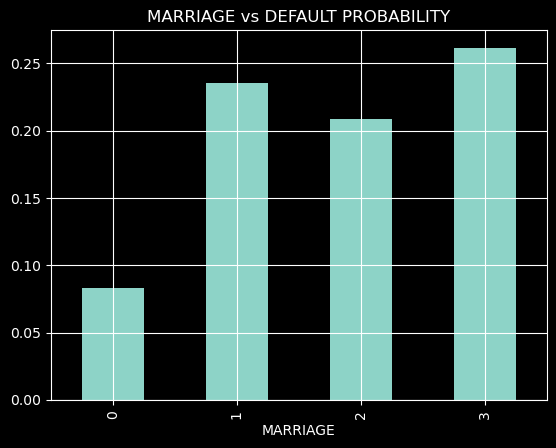

MARRIAGE
0    0.083333
1    0.235188
2    0.208306
3    0.261484
Name: default.payment.next.month, dtype: float64


In [24]:
plot_category('MARRIAGE')

In Marrige column we have to unkonwn components 0 and 3 so now we can combine them make a single element.

In [25]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3}) 

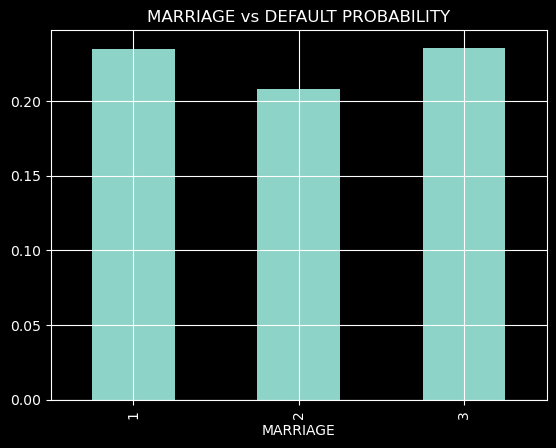

MARRIAGE
1    0.235188
2    0.208306
3    0.235650
Name: default.payment.next.month, dtype: float64


In [26]:
plot_category('MARRIAGE')

- Same as educatiopn column, we will check and go with best choice.

Age column

Mean of Age column :  35.50333333333333


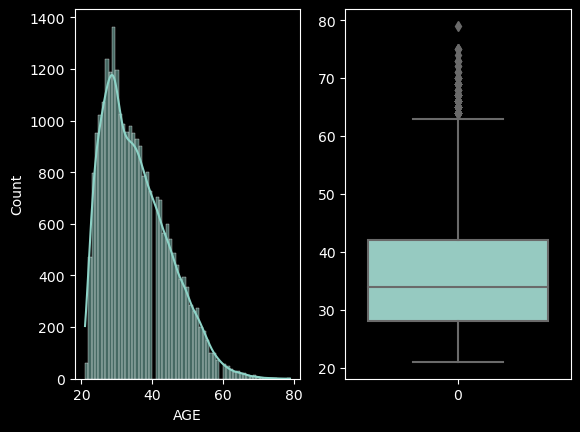

In [27]:
print('Mean of Age column : ',df['AGE'].mean())
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2);
sns.histplot(df["AGE"],ax=ax1,kde =True);
sns.boxplot(df['AGE'],ax = ax2);


Age columns has right skewed distribution with mean age 35.      
let's try power transformation technique to make normal distributed data.

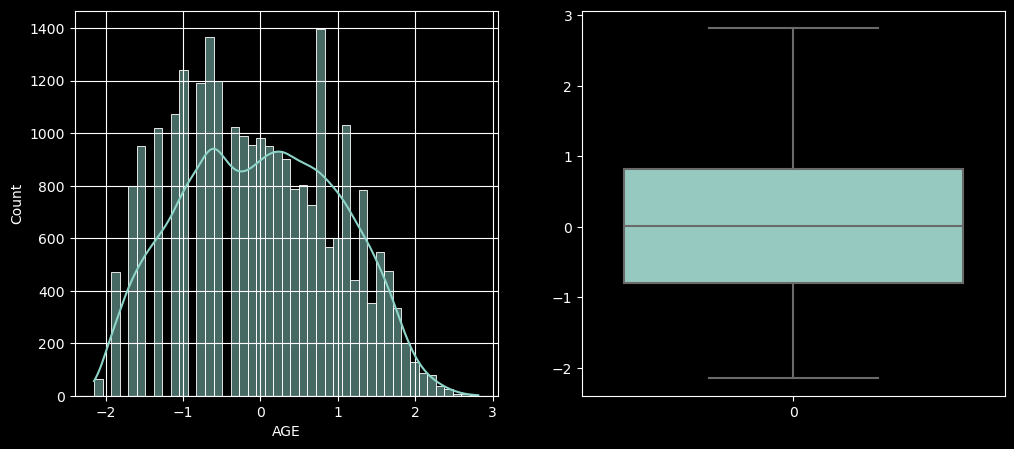

In [28]:
from sklearn.preprocessing import PowerTransformer
df2 = pd.DataFrame(df['AGE'])
pt2 = PowerTransformer()
AGE_trans = pt2.fit_transform(df2)
AGE_trans= pd.DataFrame(AGE_trans,columns=['AGE'])
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(AGE_trans['AGE'],ax=ax1,kde =True);
ax1.grid();
sns.boxplot(AGE_trans['AGE'],ax=ax2);


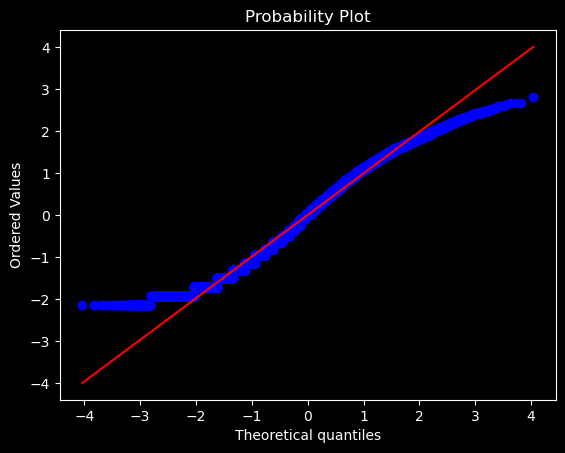

In [29]:
fig,ax = plt.subplots(ncols=1,nrows=1)
st.probplot(AGE_trans['AGE'],dist='norm',plot=ax);

In [30]:
AGE_trans['AGE'].shape

(25500,)

With yeo-jhonson transformation technique, age columns is transformed very much as normal distributed data.

In [31]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)       
PAY_2: Repayment status in August, 2005 (scale same as above)       
PAY_3: Repayment status in July, 2005 (scale same as above)        
PAY_4: Repayment status in June, 2005 (scale same as above)      
PAY_5: Repayment status in May, 2005 (scale same as above)      
PAY_6: Repayment status in April, 2005 (scale same as above)      


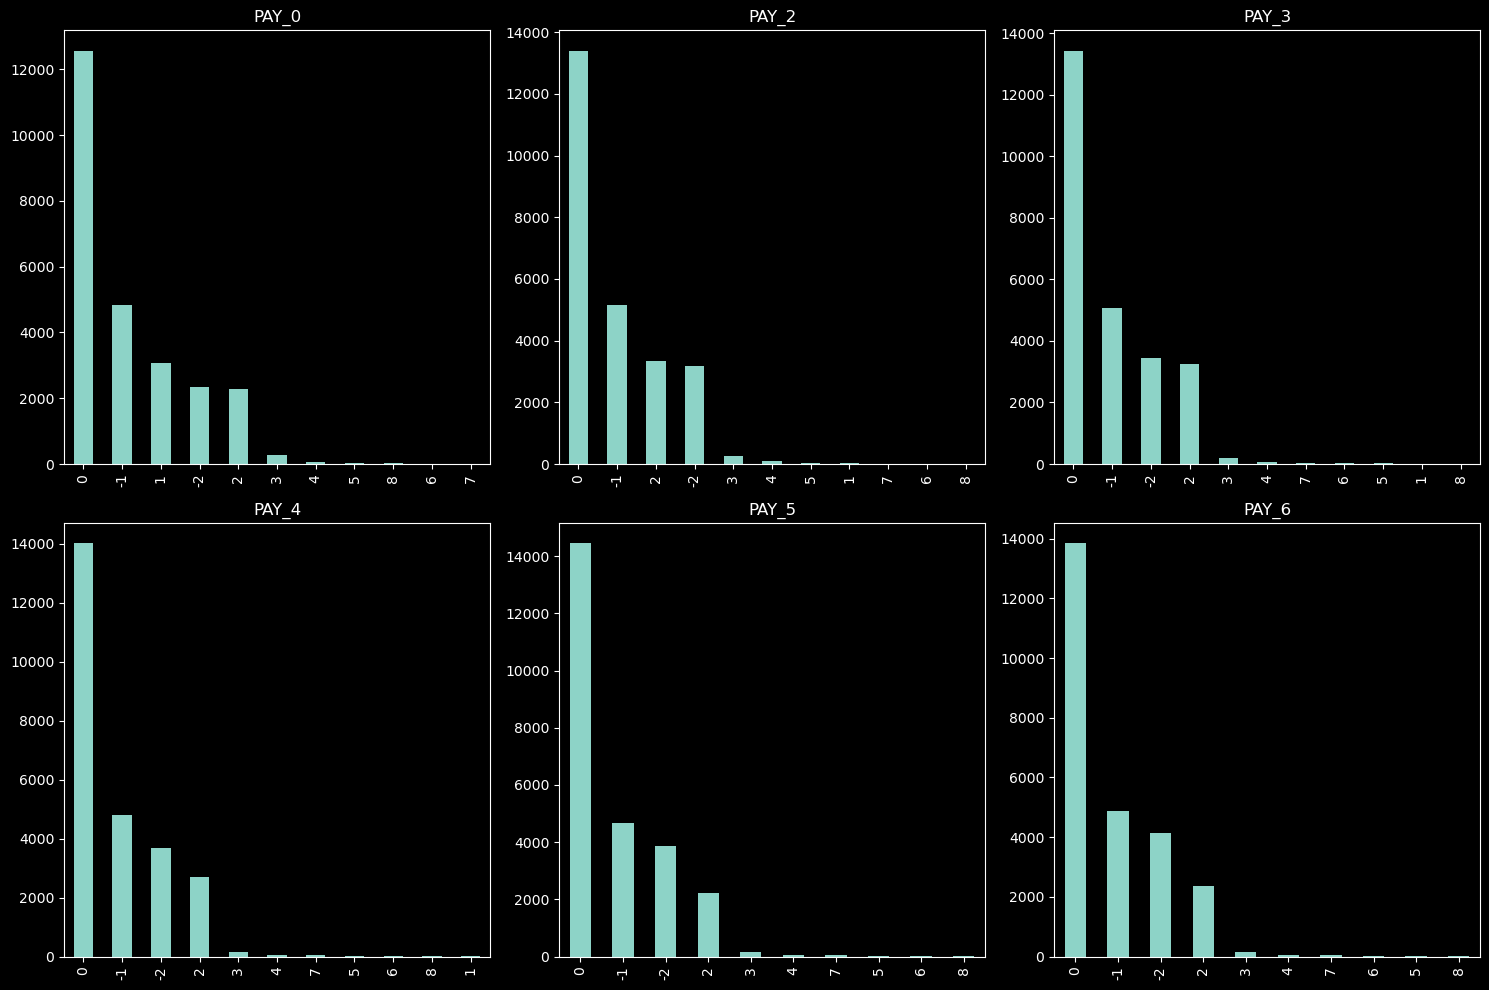

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

df['PAY_0'].value_counts().plot(kind='bar', ax=axes[0, 0], title='PAY_0')
df['PAY_2'].value_counts().plot(kind='bar', ax=axes[0, 1], title='PAY_2')
df['PAY_3'].value_counts().plot(kind='bar', ax=axes[0, 2], title='PAY_3')
df['PAY_4'].value_counts().plot(kind='bar', ax=axes[1, 0], title='PAY_4')
df['PAY_5'].value_counts().plot(kind='bar', ax=axes[1, 1], title='PAY_5')
df['PAY_6'].value_counts().plot(kind='bar', ax=axes[1, 2], title='PAY_6')

plt.tight_layout()
plt.show()


BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)       
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)        
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)       
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)        
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)       
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)       

In [33]:
df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000
mean,51154.158392,49116.369569,4.693559e+04,43139.224941,40252.920588,38846.415529
std,73720.356540,71257.228150,6.947713e+04,64214.508636,60789.101393,59397.443604
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3565.000000,3000.000000,2.729250e+03,2360.000000,1779.250000,1280.000000
50%,22366.500000,21197.000000,2.008500e+04,19033.000000,18085.000000,17129.000000
75%,66803.500000,63396.000000,5.976575e+04,54084.750000,50080.750000,49110.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


<Axes: >

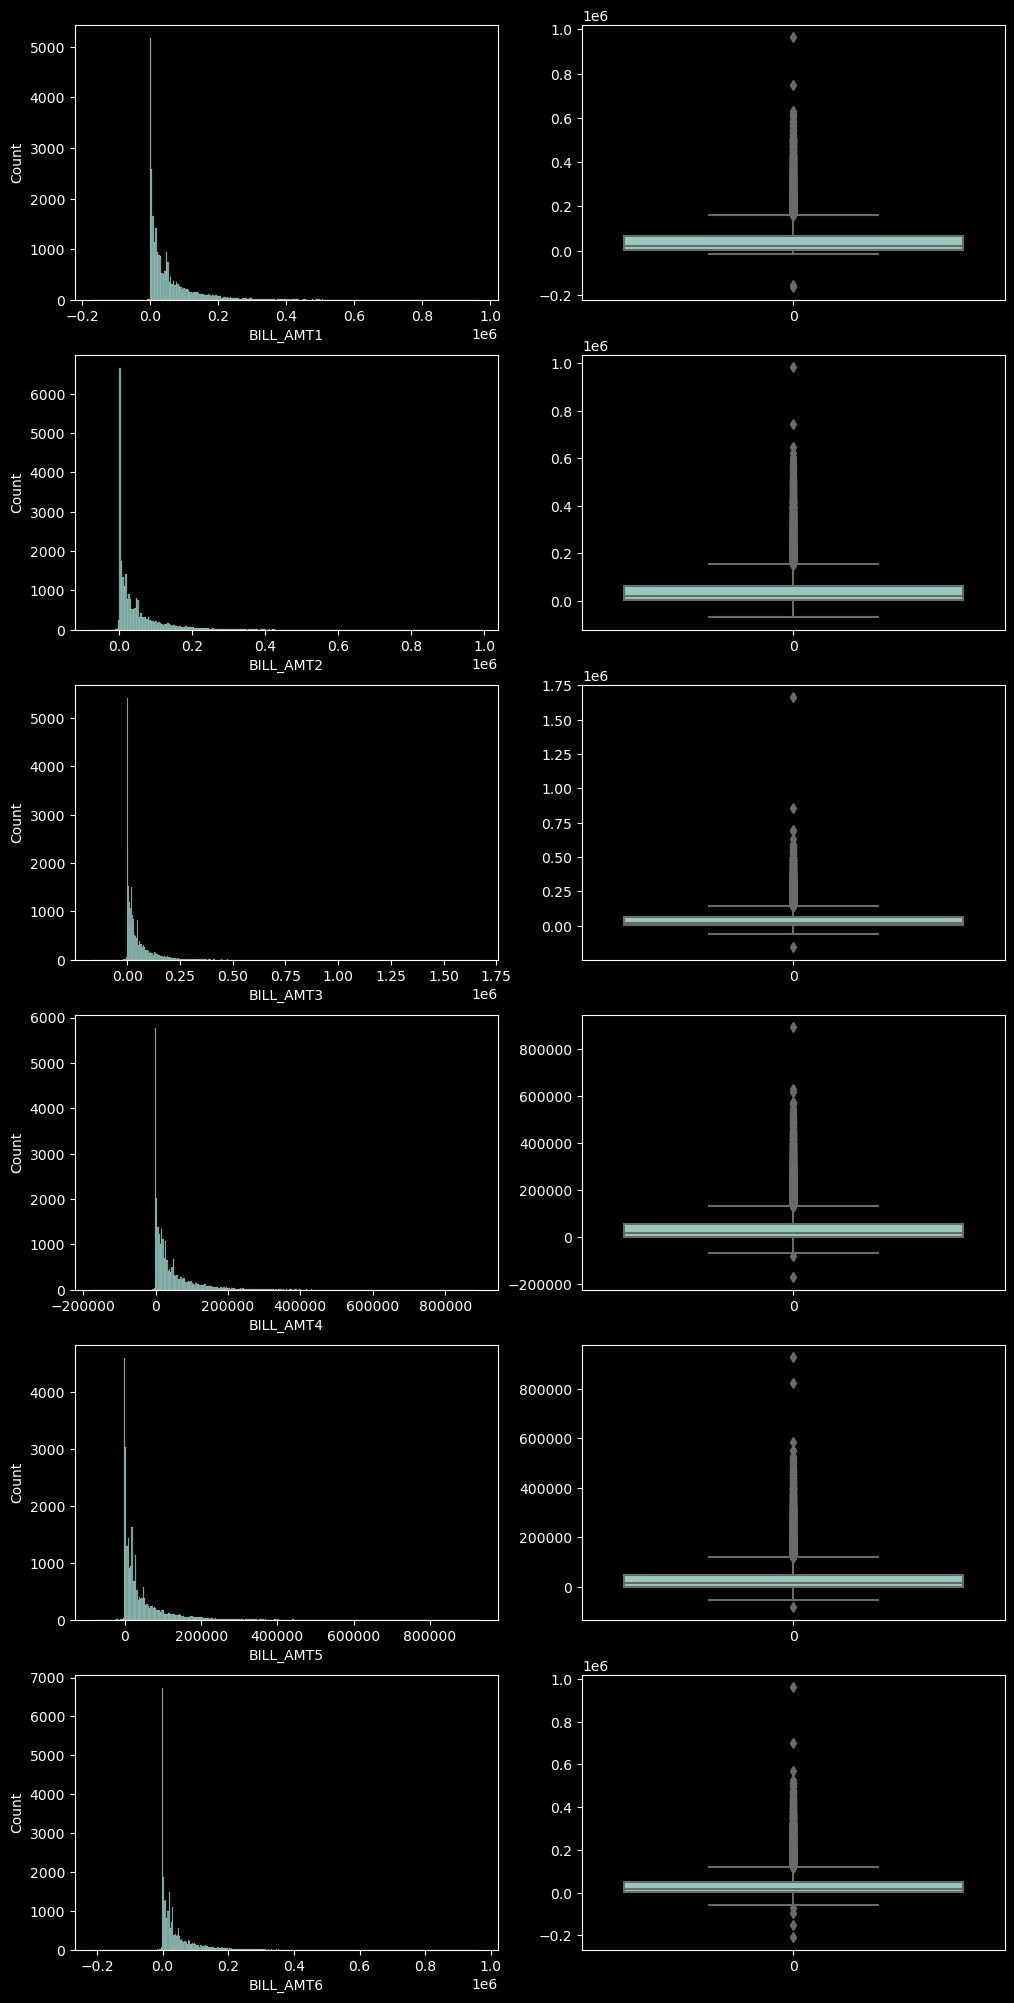

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 25))
sns.histplot(df['BILL_AMT1'],ax=axes[0, 0])
sns.boxplot(df['BILL_AMT1'],ax=axes[0, 1])
sns.histplot(df['BILL_AMT2'],ax=axes[1, 0])
sns.boxplot(df['BILL_AMT2'],ax=axes[1, 1])
sns.histplot(df['BILL_AMT3'],ax=axes[2, 0])
sns.boxplot(df['BILL_AMT3'],ax=axes[2, 1])
sns.histplot(df['BILL_AMT4'],ax=axes[3, 0])
sns.boxplot(df['BILL_AMT4'],ax=axes[3, 1])
sns.histplot(df['BILL_AMT5'],ax=axes[4, 0])
sns.boxplot(df['BILL_AMT5'],ax=axes[4, 1])
sns.histplot(df['BILL_AMT6'],ax=axes[5, 0])
sns.boxplot(df['BILL_AMT6'],ax=axes[5, 1])


In [35]:
df3 = pd.DataFrame(df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
pt3 = PowerTransformer()
BILL_trans = pt3.fit_transform(df3)
BILL_trans= pd.DataFrame(BILL_trans,columns=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

In [36]:
df4 = pd.DataFrame(BILL_trans[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
pt4 = PowerTransformer()
BILL_trans1 = pt3.fit_transform(df3)
BILL_trans1= pd.DataFrame(BILL_trans1,columns=[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])

<Axes: >

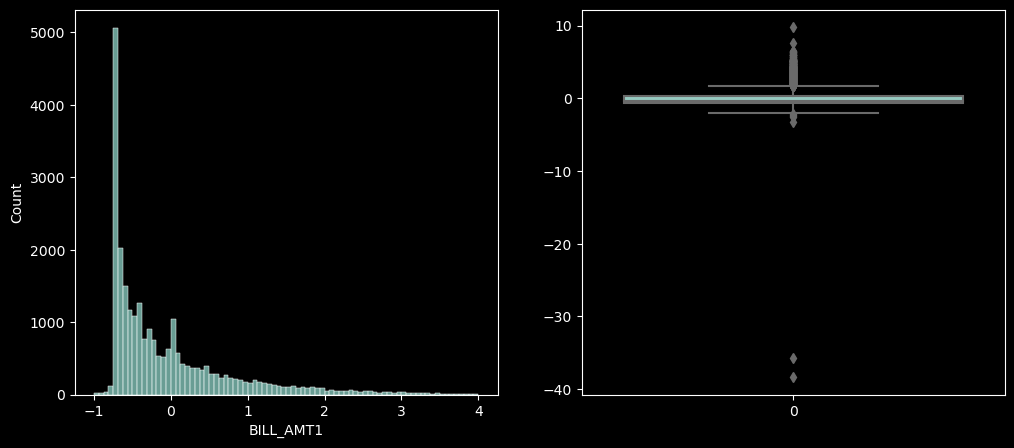

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT1'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT1'],ax= ax2)


<Axes: >

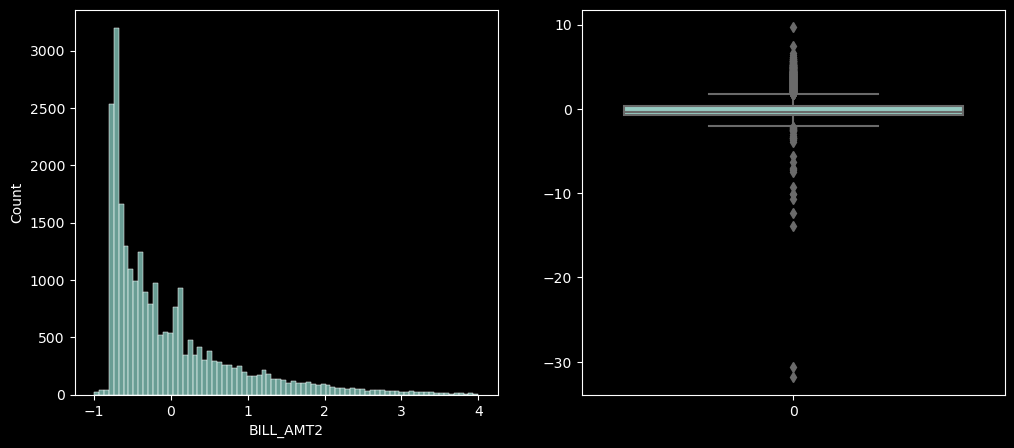

In [38]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT2'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT2'],ax= ax2)



<Axes: >

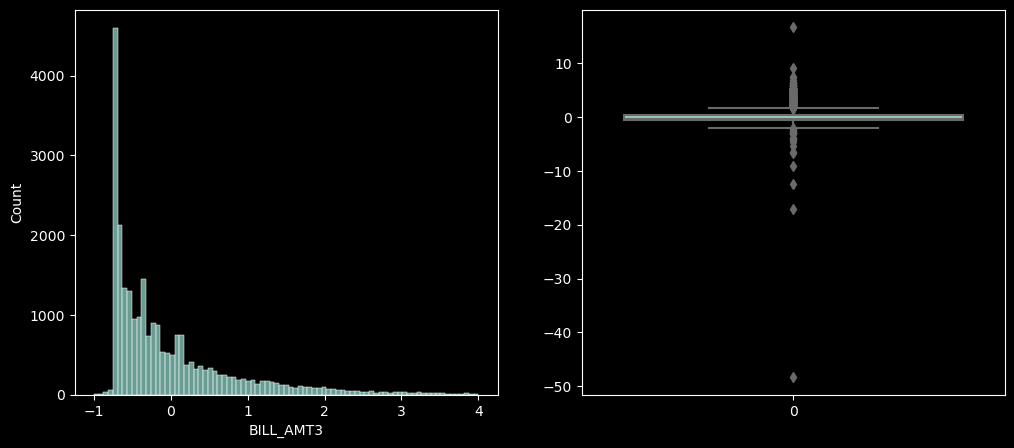

In [39]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT3'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT3'],ax= ax2)



<Axes: >

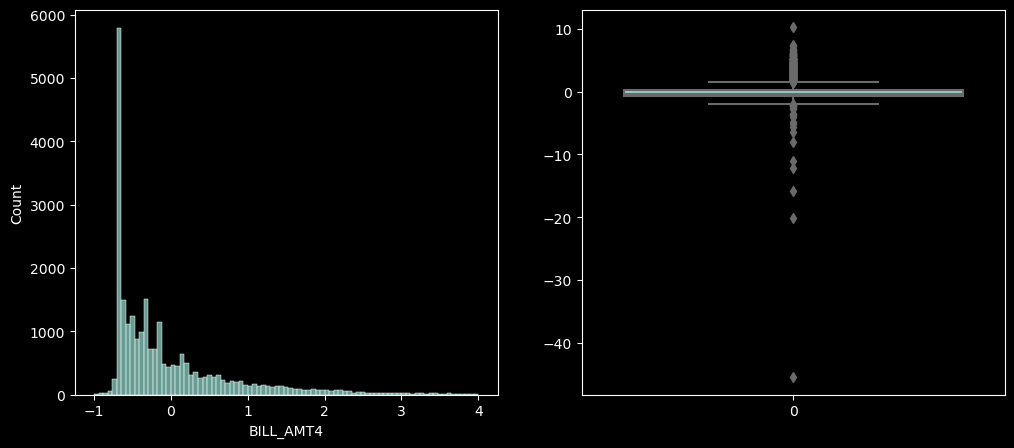

In [40]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT4'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT4'],ax= ax2)



<Axes: >

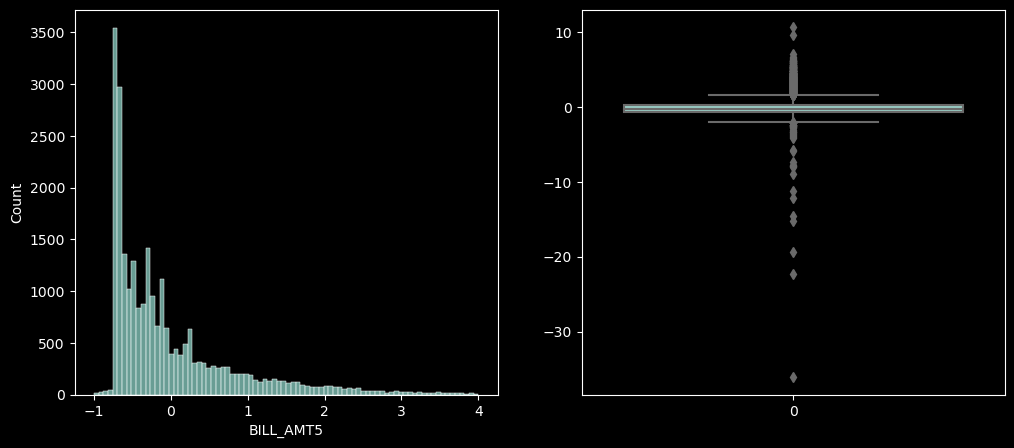

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT5'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT5'],ax= ax2)


<Axes: >

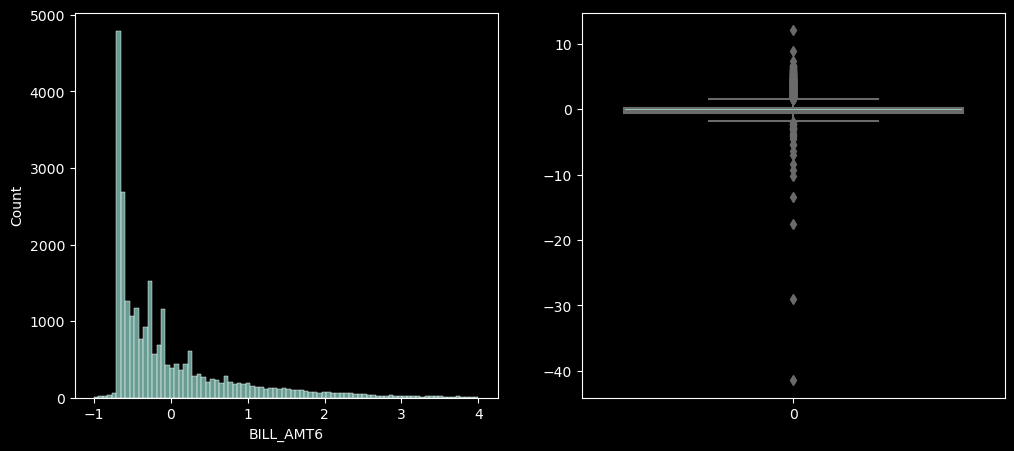

In [42]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize = (12,5));
sns.histplot(BILL_trans['BILL_AMT6'],binrange=(-1,4),ax= ax1)
sns.boxplot(BILL_trans['BILL_AMT6'],ax= ax2)


With these columns, yeo-jhonshon method is not to much good to convert this disatribution into normal distribution and these columns have large number of outliers and after transformation we still have large number of outliers. So we need to check these all columns and try to optimize these columns to get best results.

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)                            
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)                        
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)                                      
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)                          
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)                            
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)                          

In [43]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [44]:
df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]].describe(percentiles = [.75,.80,.85,.90,.95,.98])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000
mean,5690.801373,5.986709e+03,5246.605294,4829.790078,4810.296706,5187.016549
std,17070.733348,2.402498e+04,18117.236738,16021.336645,15505.873498,17568.450557
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4507.000000,4001.250000,4024.000000,4000.000000
80%,6155.800000,6.000000e+03,5255.000000,5000.000000,5000.000000,5000.000000
85%,8000.000000,7.983150e+03,7000.000000,6250.750000,6283.150000,6192.350000
90%,10261.400000,1.050000e+04,10000.000000,9473.100000,9480.700000,9583.400000
95%,18388.250000,1.914110e+04,17597.350000,16000.000000,15963.750000,17285.300000


<Axes: >

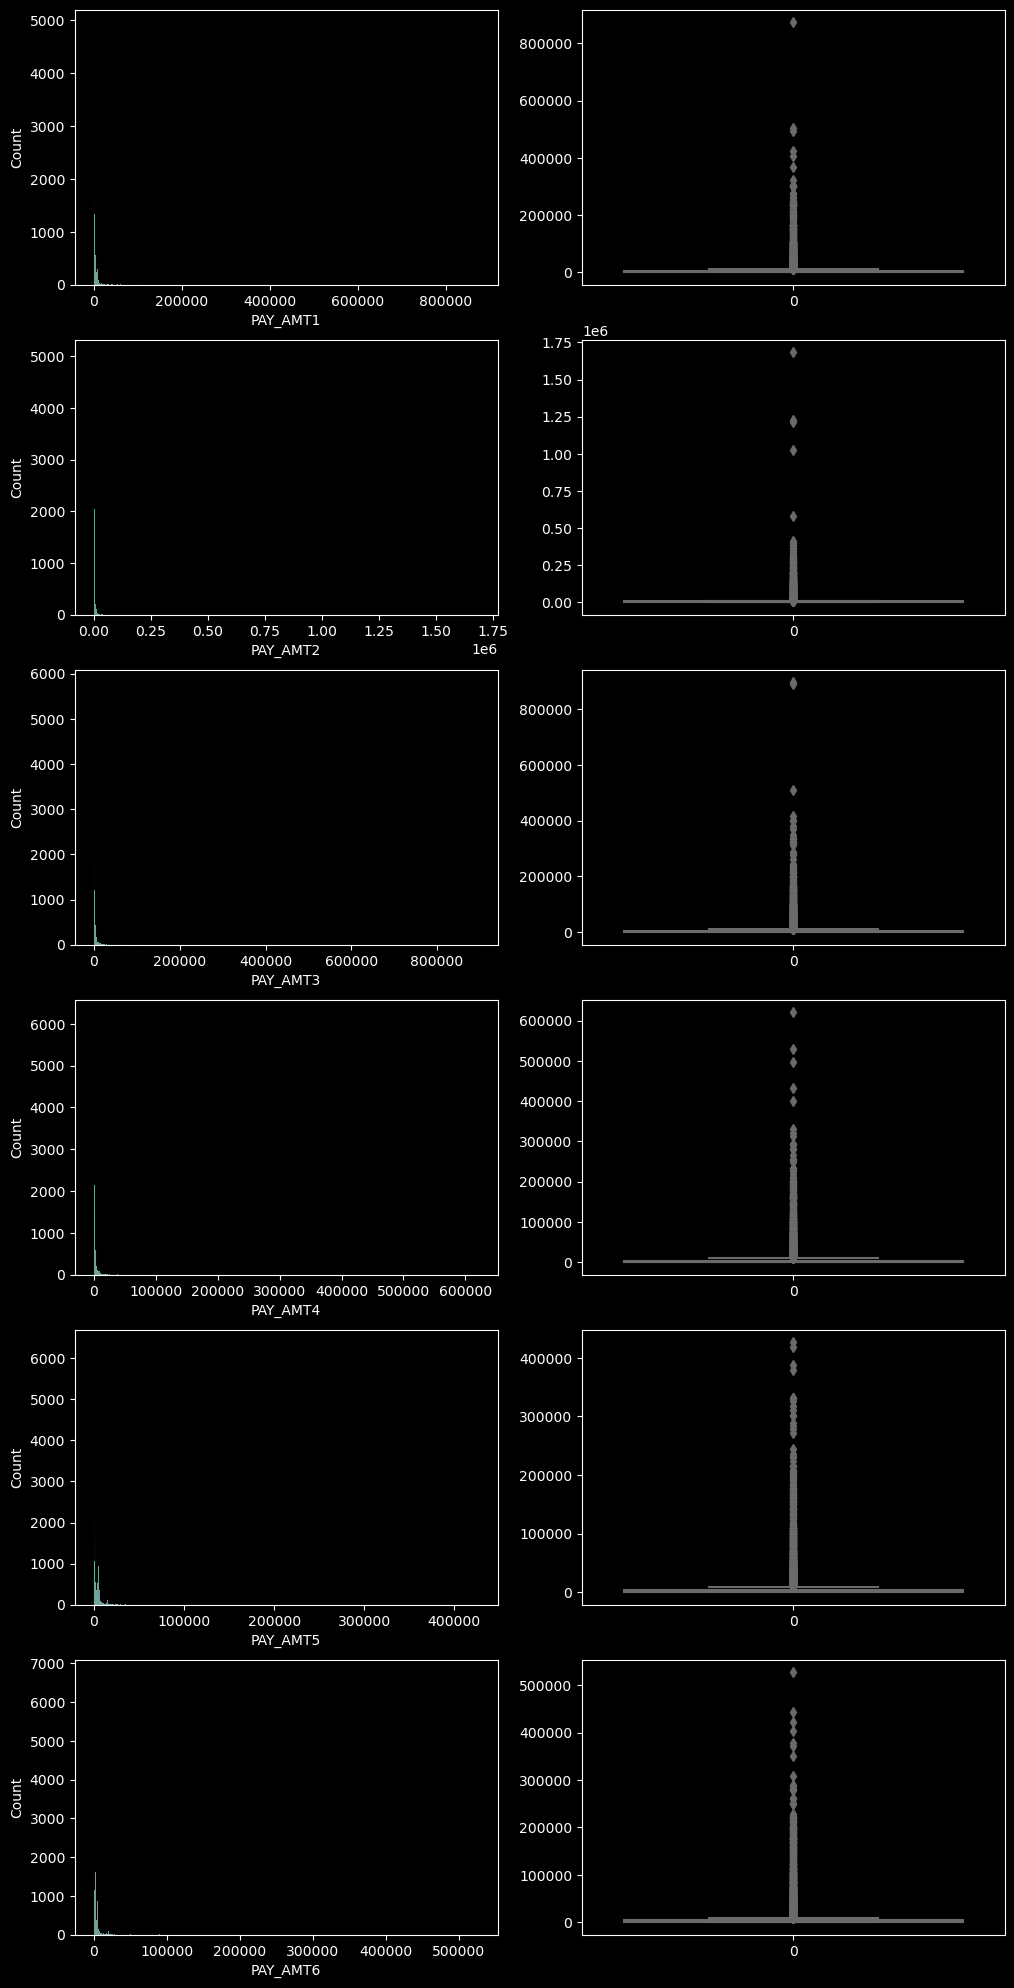

In [45]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 25))
sns.histplot(df['PAY_AMT1'],ax=axes[0, 0])
sns.boxplot(df['PAY_AMT1'],ax=axes[0, 1])
sns.histplot(df['PAY_AMT2'],ax=axes[1, 0])
sns.boxplot(df['PAY_AMT2'],ax=axes[1, 1])
sns.histplot(df['PAY_AMT3'],ax=axes[2, 0])
sns.boxplot(df['PAY_AMT3'],ax=axes[2, 1])
sns.histplot(df['PAY_AMT4'],ax=axes[3, 0])
sns.boxplot(df['PAY_AMT4'],ax=axes[3, 1])
sns.histplot(df['PAY_AMT5'],ax=axes[4, 0])
sns.boxplot(df['PAY_AMT5'],ax=axes[4, 1])
sns.histplot(df['PAY_AMT6'],ax=axes[5, 0])
sns.boxplot(df['PAY_AMT6'],ax=axes[5, 1])


((array([-4.03602794, -3.82277367, -3.70620366, ...,  3.70620366,
          3.82277367,  4.03602794]),
  array([     0.,      0.,      0., ..., 422000., 443001., 527143.])),
 (8843.955857217068, 5187.0165490196105, 0.503332654334441))

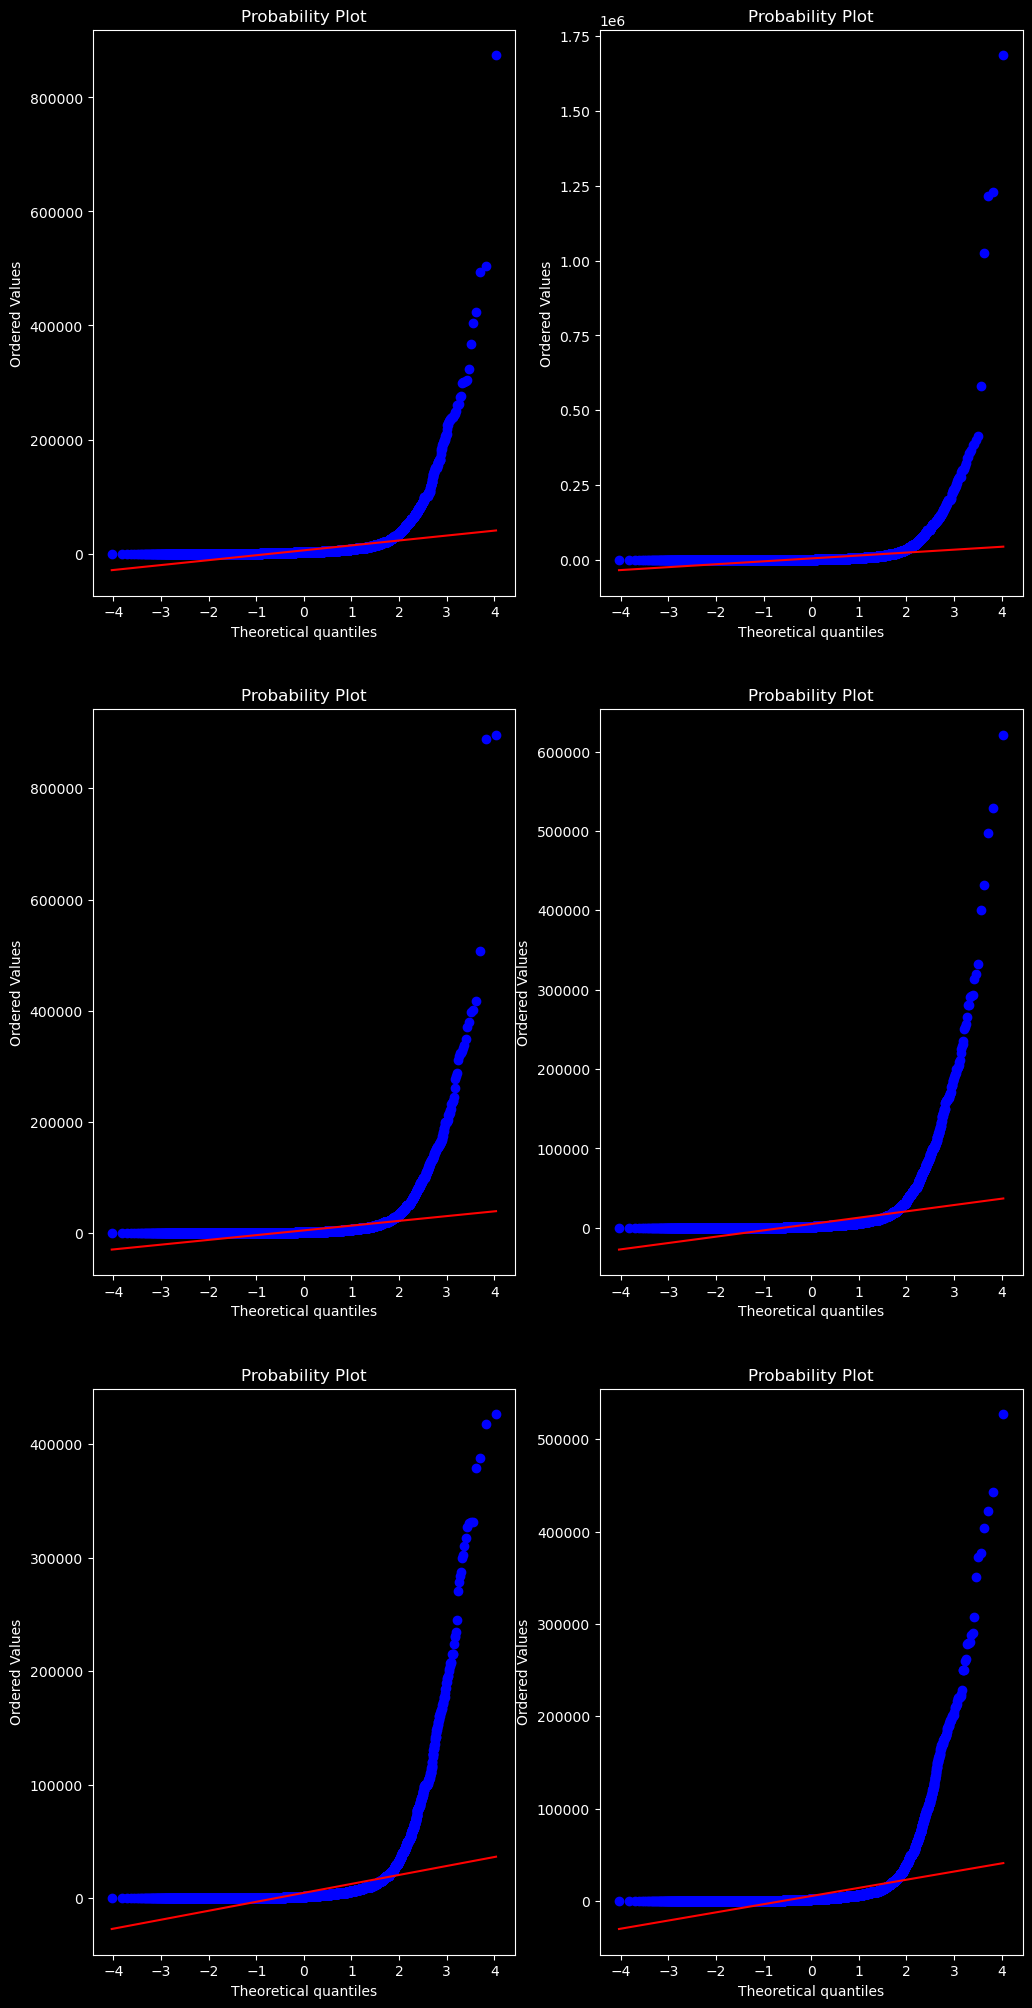

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 25))
st.probplot(df['PAY_AMT1'],plot=axes[0, 0],dist='norm')
st.probplot(df['PAY_AMT2'],plot=axes[0, 1],dist='norm')
st.probplot(df['PAY_AMT3'],plot=axes[1, 0],dist='norm')
st.probplot(df['PAY_AMT4'],plot=axes[1, 1],dist='norm')
st.probplot(df['PAY_AMT5'],plot=axes[2, 0],dist='norm')
st.probplot(df['PAY_AMT6'],plot=axes[2, 1],dist='norm')

In [47]:
df5 = pd.DataFrame(df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
pt5 = PowerTransformer()
PAY_trans = pt5.fit_transform(df5)
PAY_trans= pd.DataFrame(PAY_trans,columns=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

<Axes: >

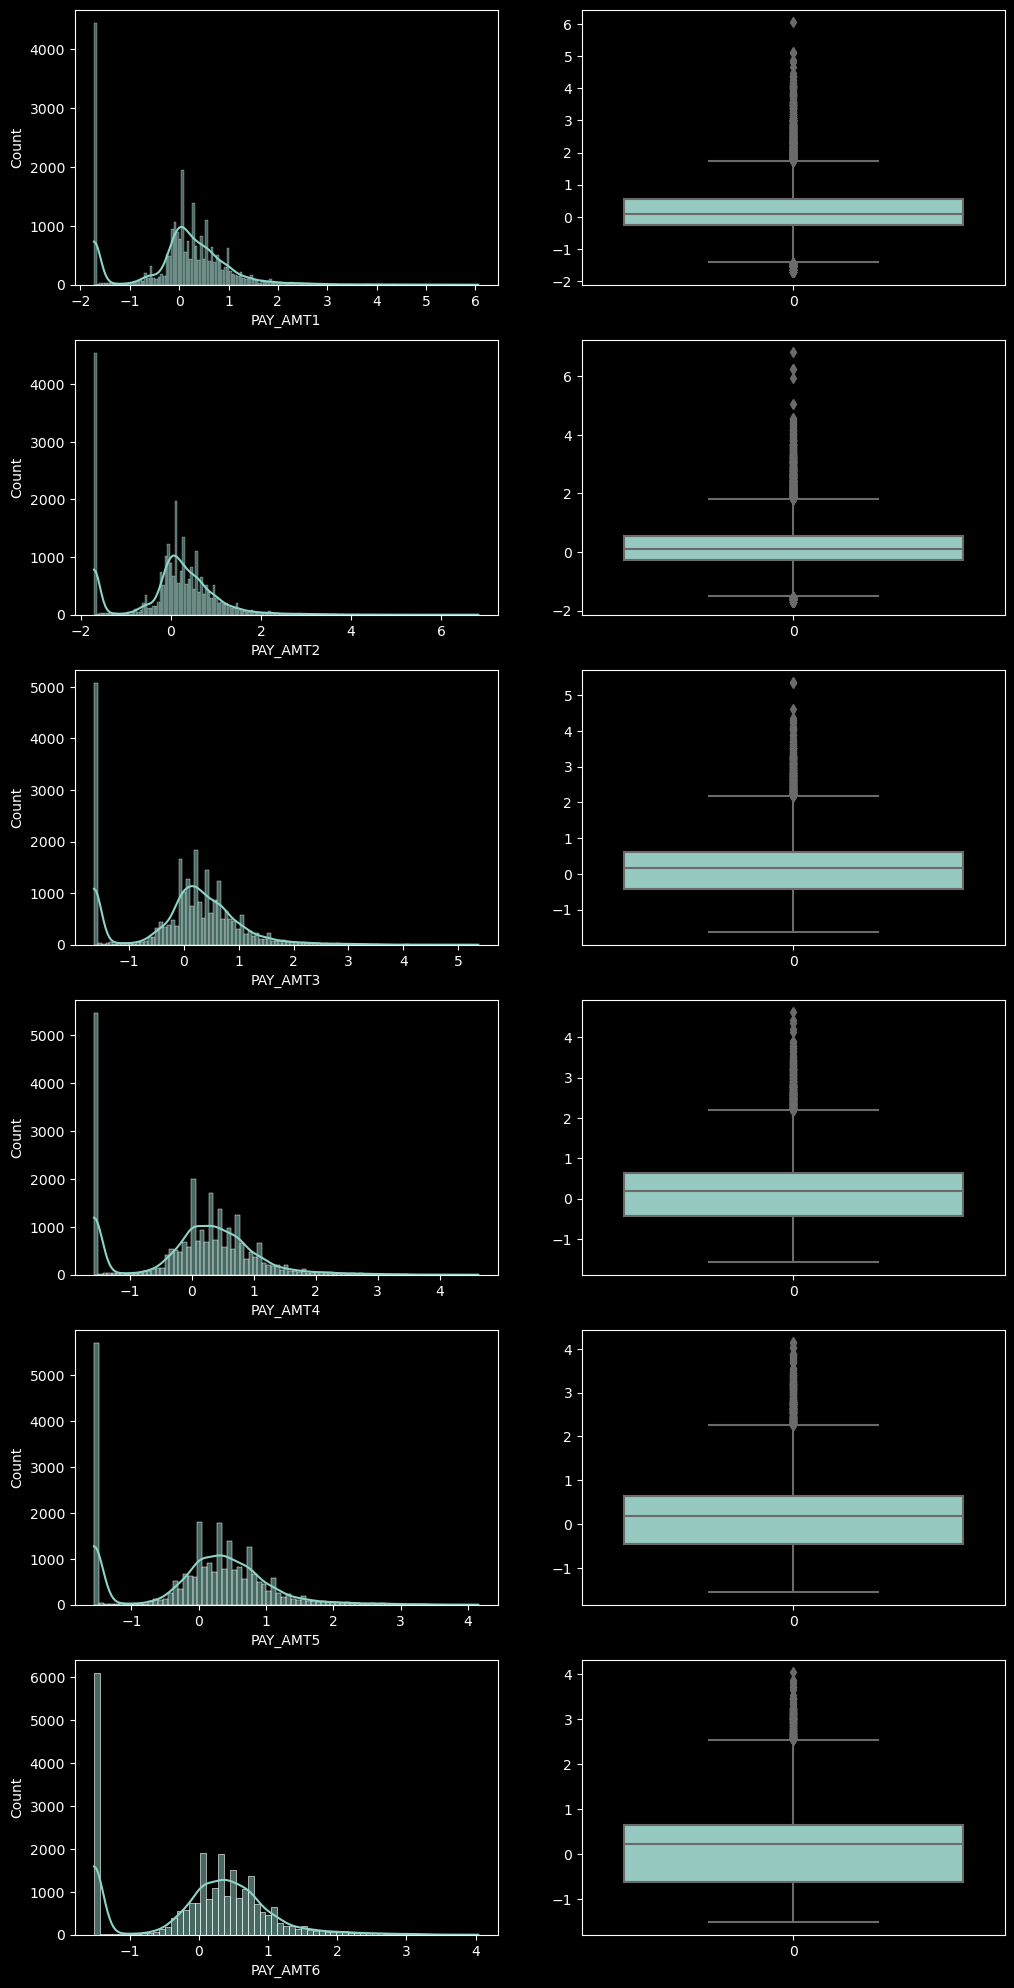

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 25))
sns.histplot(PAY_trans['PAY_AMT1'],ax=axes[0, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT1'],ax=axes[0, 1])
sns.histplot(PAY_trans['PAY_AMT2'],ax=axes[1, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT2'],ax=axes[1, 1])
sns.histplot(PAY_trans['PAY_AMT3'],ax=axes[2, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT3'],ax=axes[2, 1])
sns.histplot(PAY_trans['PAY_AMT4'],ax=axes[3, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT4'],ax=axes[3, 1])
sns.histplot(PAY_trans['PAY_AMT5'],ax=axes[4, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT5'],ax=axes[4, 1])
sns.histplot(PAY_trans['PAY_AMT6'],ax=axes[5, 0],kde = True)
sns.boxplot(PAY_trans['PAY_AMT6'],ax=axes[5, 1])


((array([-4.03602794, -3.82277367, -3.70620366, ...,  3.70620366,
          3.82277367,  4.03602794]),
  array([-1.51543422, -1.51543422, -1.51543422, ...,  3.81977294,
          3.86669756,  4.0376771 ])),
 (0.9500203265836333, 6.870322329557724e-16, 0.9498748370334136))

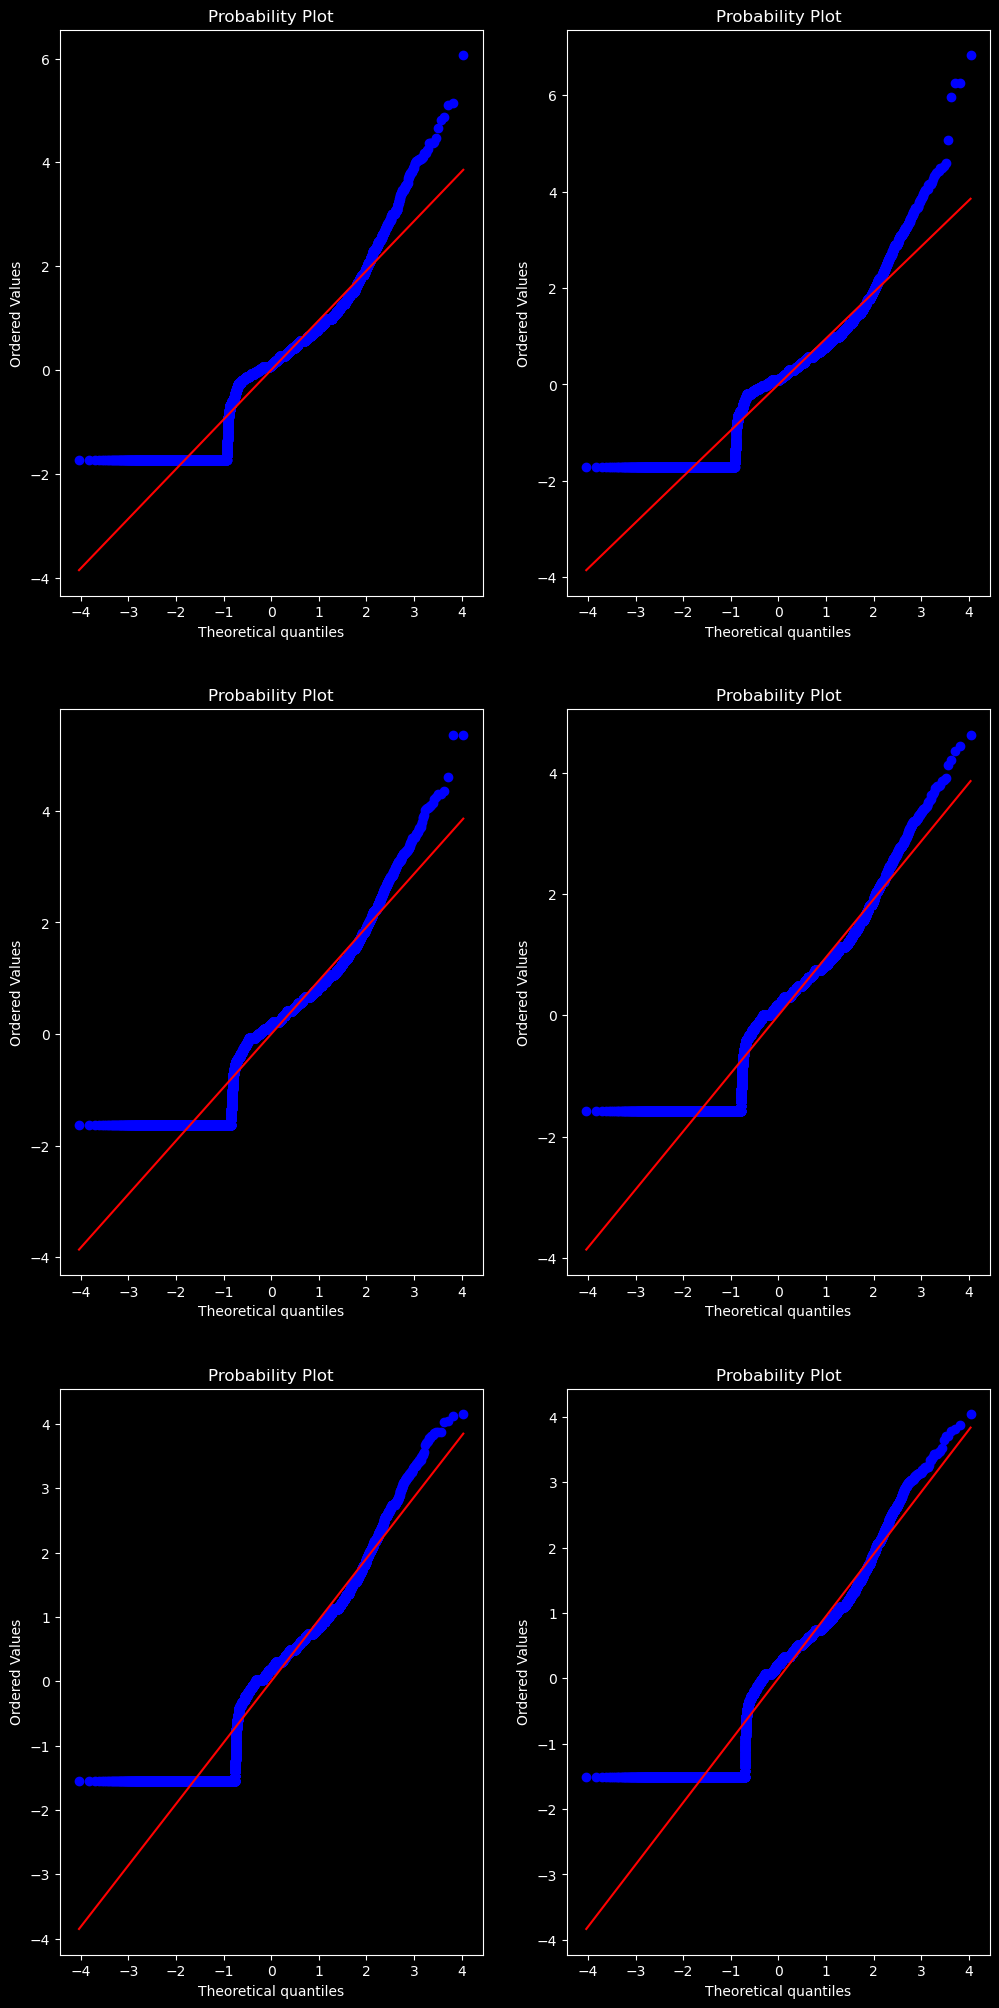

In [49]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 25))
st.probplot(PAY_trans['PAY_AMT1'],plot=axes[0, 0],dist='norm')
st.probplot(PAY_trans['PAY_AMT2'],plot=axes[0, 1],dist='norm')
st.probplot(PAY_trans['PAY_AMT3'],plot=axes[1, 0],dist='norm')
st.probplot(PAY_trans['PAY_AMT4'],plot=axes[1, 1],dist='norm')
st.probplot(PAY_trans['PAY_AMT5'],plot=axes[2, 0],dist='norm')
st.probplot(PAY_trans['PAY_AMT6'],plot=axes[2, 1],dist='norm')

With yeo jhonson transformation technique we achive near normal distribution but still there is large number of outliers are still there.

In [51]:
data.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


### Overview on data
- Data has 30000 Rows and 25 columns. But this data can be devided into 9 parts ('ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY', 'BILL_AMT', 'PAY_AMT','target_column')
- ID columns has no relation with other coulmns so it can droped.
- Data is prety good as it has no empty elements in any columns and also there is no duplicate entries in data.
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) :- Here (1=graduate school, 2=university, 3=high school) are perfectly define orderd categories but we have no more info related to ( 4=others, 5=unknown, 6=unknown) these columns so we can concatenate these columns and put it as 0 or 4 to messure there impact in our further analysis.
- MARRIAGE: Marital status (1=married, 2=single, 3=others) :-  (3=others) for these column, there is no to much info so we need to carefully analysis this column and messure the impact on our analysis.
- PAY: Repayment status in Months, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [52]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [74]:
data['SEX'] = data['SEX'].replace({1:"Male",2:"Female"})
EDU = {0:"No Education", 1:"Graduate School", 2:"University",3:"High School",4:"Other",5:"Other",6:"Other"}
data['EDUCATION']=data['EDUCATION'].replace(EDU)
Marrige_column = {1:"Married",2:"Single",0:"Other",3:"Other"}
data['MARRIAGE'] = data['MARRIAGE'].replace(Marrige_column)
target = {1:"Yes", 0:"No"}
data['default.payment.next.month'] = data['default.payment.next.month'].replace(target)

In [83]:
data['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [75]:
data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,Female,Female,Female,Female,Male
EDUCATION,University,University,University,University,University
MARRIAGE,Married,Single,Single,Married,Married
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [77]:
data.to_csv(r'F:\Machine_learning\Credit_Card_Default_Prediction_and_Model_Deployment_Project\notebooks\data\UCI_Credit_Card_updated.csv',index=False)